## Data Handling & Preprocessing

In [4]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
from shapely.geometry import box
import geopandas as gpd
import plotly.express as px
import geodatasets
from matplotlib.colors import ListedColormap, Normalize
from statsmodels.tsa.stattools import grangercausalitytests, ccf
from datetime import datetime
import warnings
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
warnings.filterwarnings("ignore")

from data_preprocessing import * 


#### Introduction

In the first part of this notebook, we aim to explore the dataset we will be working with. We will conduct basic exploratory data analysis (EDA), focusing on identifying missing data, determining key features relevant to our problem, and understanding how to merge two datasets: NOAA_StormsEvents (weather conditions) and eaglei_data (power outages).

## NOAA_StormsEvents Data Analysis

### Data Description  

The table below provides a detailed description of the columns in the **NOAA_StormsEvents** dataset.  

| Column Name            | Description |
|------------------------|-------------|
| **BEGIN_YEARMONTH**    | Year and month when the event began (e.g., 201401 for January 2014). |
| **BEGIN_DAY**          | Day of the month when the event started. |
| **BEGIN_TIME**         | Time when the event started, in HHMM format (e.g., 1530 for 3:30 PM). |
| **END_YEARMONTH**      | Year and month when the event ended. |
| **END_DAY**           | Day of the month when the event ended. |
| **END_TIME**          | Time when the event ended, in HHMM format. |
| **EPISODE_ID**        | Unique identifier for a specific weather episode. |
| **EVENT_ID**          | Unique identifier for a specific event within an episode. |
| **STATE**             | Name of the state where the event occurred. |
| **STATE_FIPS**        | FIPS (Federal Information Processing Standard) code for the state. |
| **YEAR**              | Year when the event took place. |
| **MONTH_NAME**        | Name of the month when the event occurred (e.g., "January"). |
| **EVENT_TYPE**        | Type of weather event (e.g., tornado, thunderstorm, flood). |
| **CZ_TYPE**          | Type of area where the event occurred (C = County, Z = Weather Zone). |
| **CZ_FIPS**          | FIPS code for the county or weather zone. |
| **CZ_NAME**          | Name of the county or weather zone. |
| **WFO**              | Code of the Weather Forecast Office (WFO) that reported the event. |
| **BEGIN_DATE_TIME**   | Date and time when the event began. |
| **CZ_TIMEZONE**      | Time zone of the affected area. |
| **END_DATE_TIME**     | Date and time when the event ended. |
| **INJURIES_DIRECT**   | Number of direct injuries caused by the event. |
| **INJURIES_INDIRECT** | Number of indirect injuries related to the event (e.g., traffic accidents caused by weather conditions). |
| **DEATHS_DIRECT**     | Number of direct fatalities caused by the event. |
| **DEATHS_INDIRECT**   | Number of indirect fatalities related to the event. |
| **DAMAGE_PROPERTY**   | Estimated property damage caused by the event. |
| **DAMAGE_CROPS**      | Estimated crop damage caused by the event. |
| **SOURCE**            | Source of information about the event (e.g., weather observer, media, government reports). |
| **MAGNITUDE**         | Measurement of event intensity (e.g., wind speed, wave height, hail size). |
| **MAGNITUDE_TYPE**    | Unit of measurement for event intensity (e.g., MPH – miles per hour). |
| **FLOOD_CAUSE**       | Cause of flooding, if applicable (e.g., heavy rainfall, snowmelt). |
| **CATEGORY**         | Event category (applicable to hurricanes, for example). |
| **TOR_F_SCALE**       | Fujita scale rating for tornadoes (F0–F5, indicating tornado intensity). |
| **TOR_LENGTH**        | Tornado path length in miles. |
| **TOR_WIDTH**         | Tornado path width in yards. |
| **TOR_OTHER_WFO**     | Code of another Weather Forecast Office responsible for an affected area. |
| **TOR_OTHER_CZ_STATE**| State code where the tornado moved. |
| **TOR_OTHER_CZ_FIPS** | FIPS code of the county or weather zone where the tornado moved. |
| **TOR_OTHER_CZ_NAME** | Name of the county or weather zone where the tornado moved. |
| **BEGIN_RANGE**       | Distance from a reference point to the event's starting location. |
| **BEGIN_AZIMUTH**     | Azimuth (direction) of the event's starting location relative to a reference point. |
| **BEGIN_LOCATION**    | Name of the location where the event began. |
| **END_RANGE**        | Distance from a reference point to the event's ending location. |
| **END_AZIMUTH**      | Azimuth (direction) of the event's ending location relative to a reference point. |
| **END_LOCATION**      | Name of the location where the event ended. |
| **BEGIN_LAT**         | Latitude of the event's starting location. |
| **BEGIN_LON**         | Longitude of the event's starting location. |
| **END_LAT**           | Latitude of the event's ending location. |
| **END_LON**           | Longitude of the event's ending location. |
| **EPISODE_NARRATIVE** | Description of the entire weather episode. |
| **EVENT_NARRATIVE**   | Description of a specific event within the episode. |
| **DATA_SOURCE**       | Source of meteorological data. |


#### Data Loading

Since power outage data is only available for the years 2014–2023, we will not consider the year 2024.

In [2]:
stormEvents_2014 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2014_c20231116.csv")
stormEvents_2015 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2015_c20240716.csv")
stormEvents_2016 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2016_c20220719.csv")
stormEvents_2017 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2017_c20230317.csv")
stormEvents_2018 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2018_c20240716.csv")
stormEvents_2019 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2019_c20240117.csv")
stormEvents_2020 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2020_c20240620.csv")
stormEvents_2021 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2021_c20240716.csv")
stormEvents_2022 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2022_c20241121.csv")
stormEvents_2023 = pd.read_csv("../data/NOAA_StormEvents/StormEvents_details-ftp_v1.0_d2023_c20241216.csv")

In [3]:
stormEvents_2014.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

#### EVENT_TYPE Analysis

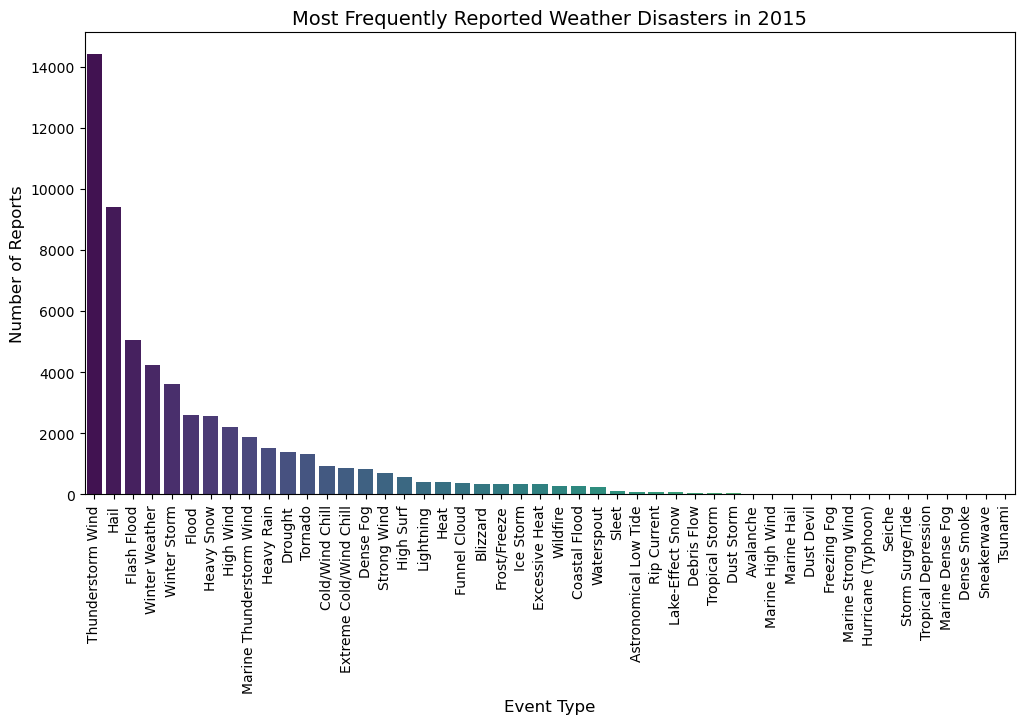

In [4]:
plot_event_counts(stormEvents_2015)

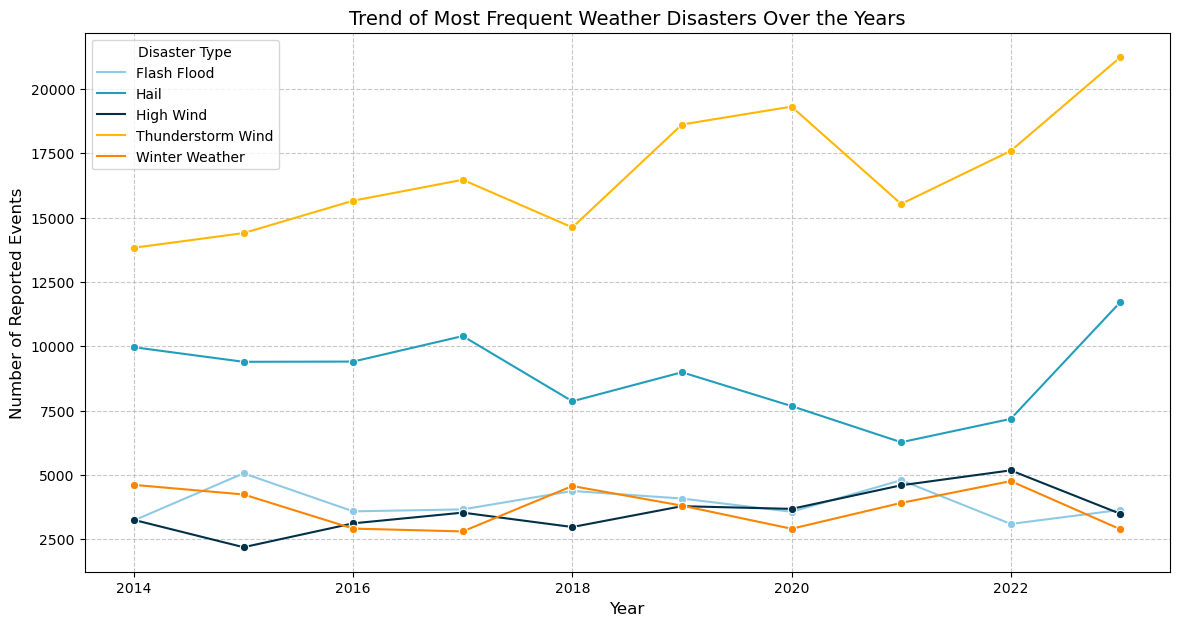

In [5]:
dfs = [stormEvents_2014, stormEvents_2015, stormEvents_2016, stormEvents_2017, stormEvents_2018,
       stormEvents_2019, stormEvents_2020, stormEvents_2021, stormEvents_2022, stormEvents_2023]
plot_event_trends(dfs)


After analyzing the number of reports from each type, it can be observed that the most frequently reported events are Thunderstorm Wind, Hail, and Flash Flood, and this trend has not changed significantly over the years. In the next section, we will take a closer look at this data in more detail.

<Figure size 1200x600 with 0 Axes>

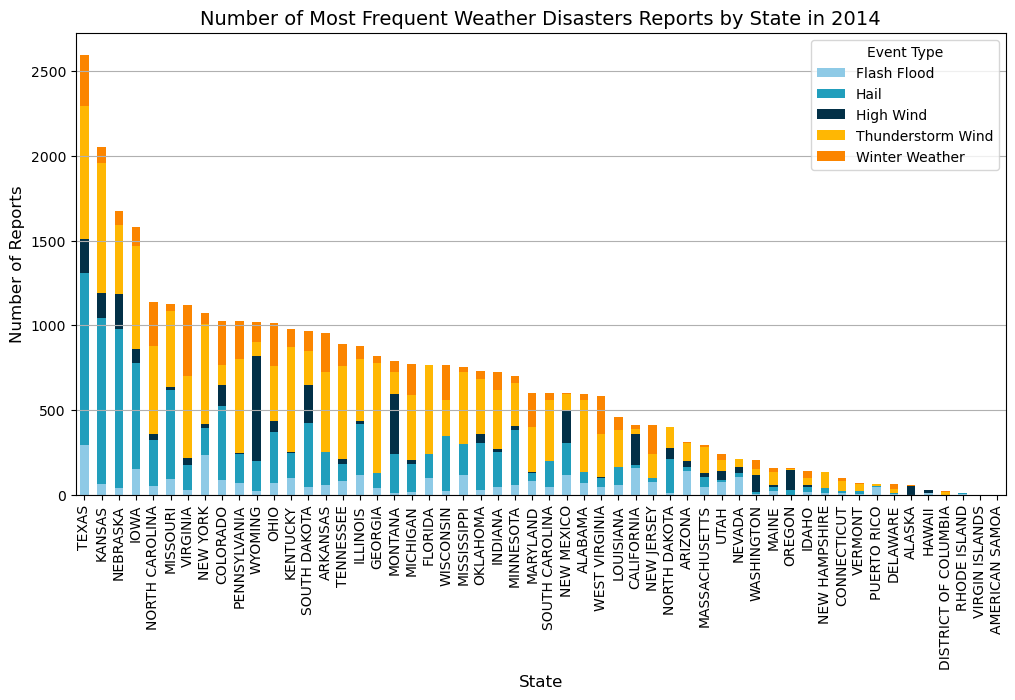

In [6]:
plot_state_event_counts(stormEvents_2014)

<Figure size 1200x600 with 0 Axes>

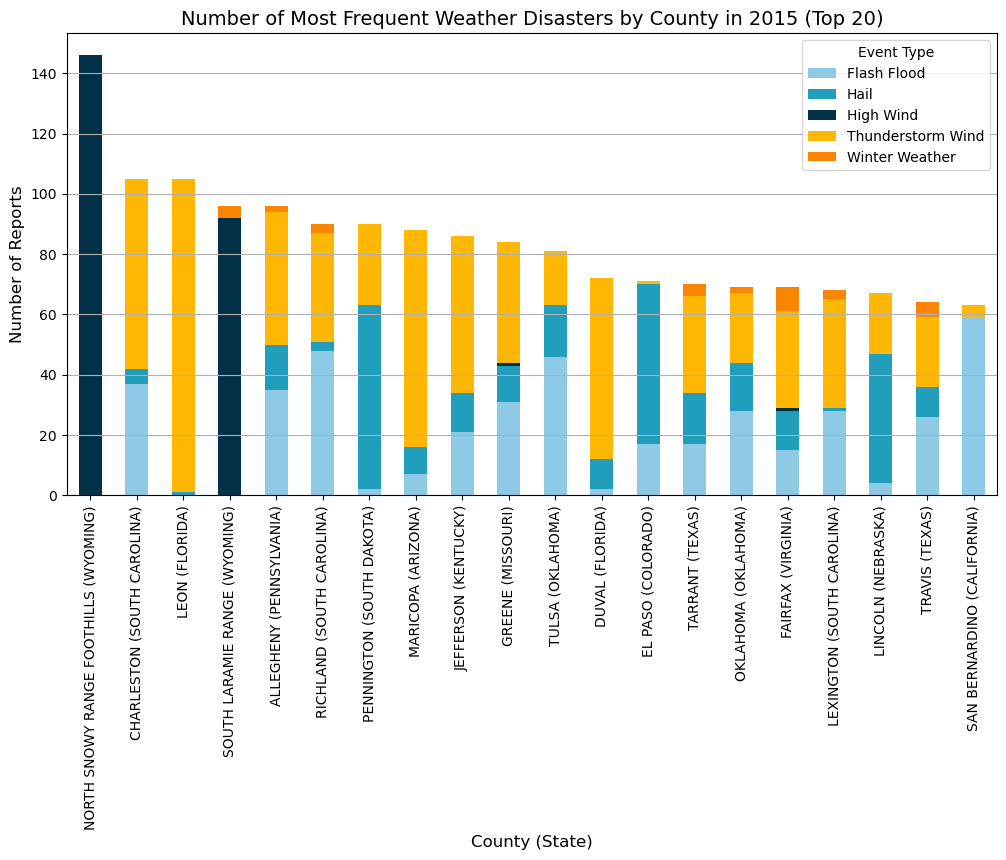

In [7]:
plot_county_event_counts(stormEvents_2015)

### Seasonality of Storm Events Analysis
The next element to be analyzed will be the seasonality of weather-related disasters. We will try to find correlations between the season of the year and the intensity of events, to determine whether time will be a significant feature for modeling.

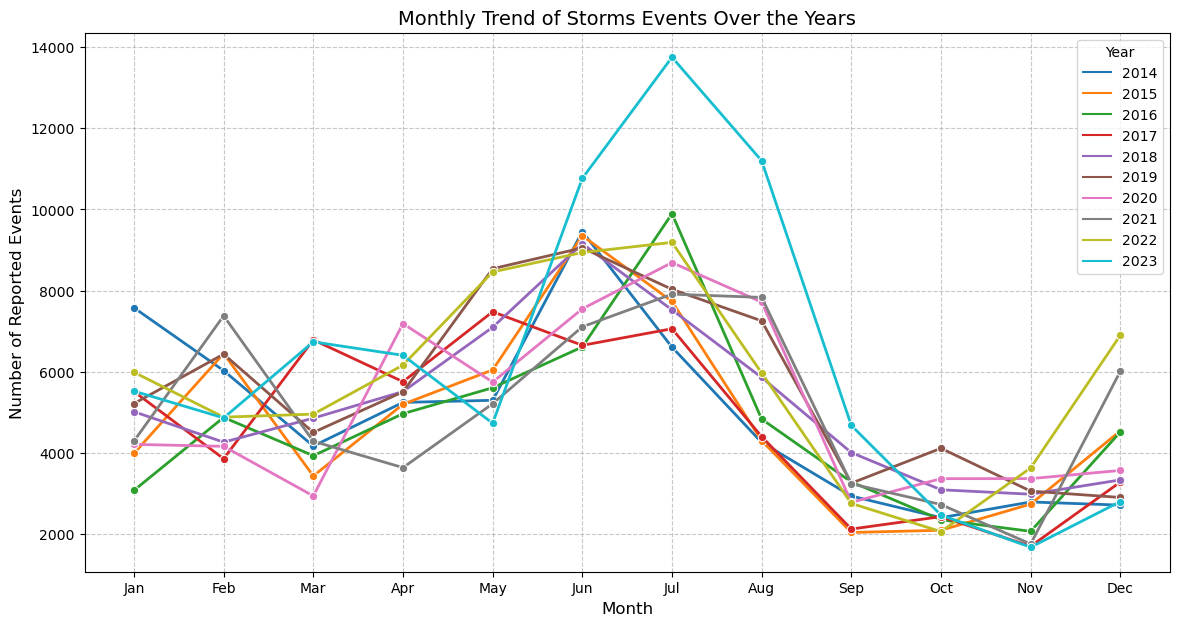

In [8]:
plot_monthly_event_trends(dfs)

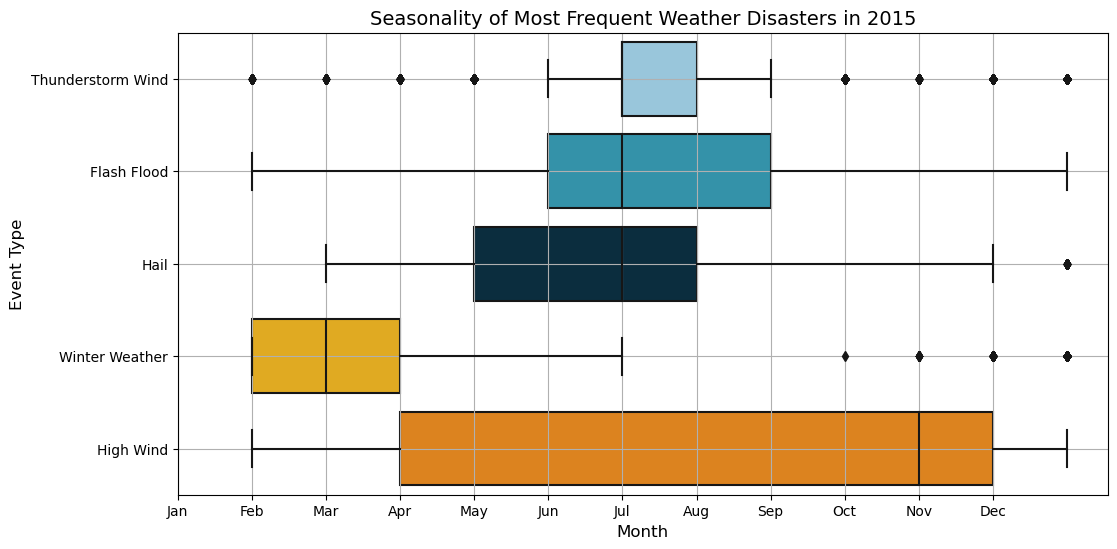

In [9]:
plot_state_event_seasonality(stormEvents_2015)

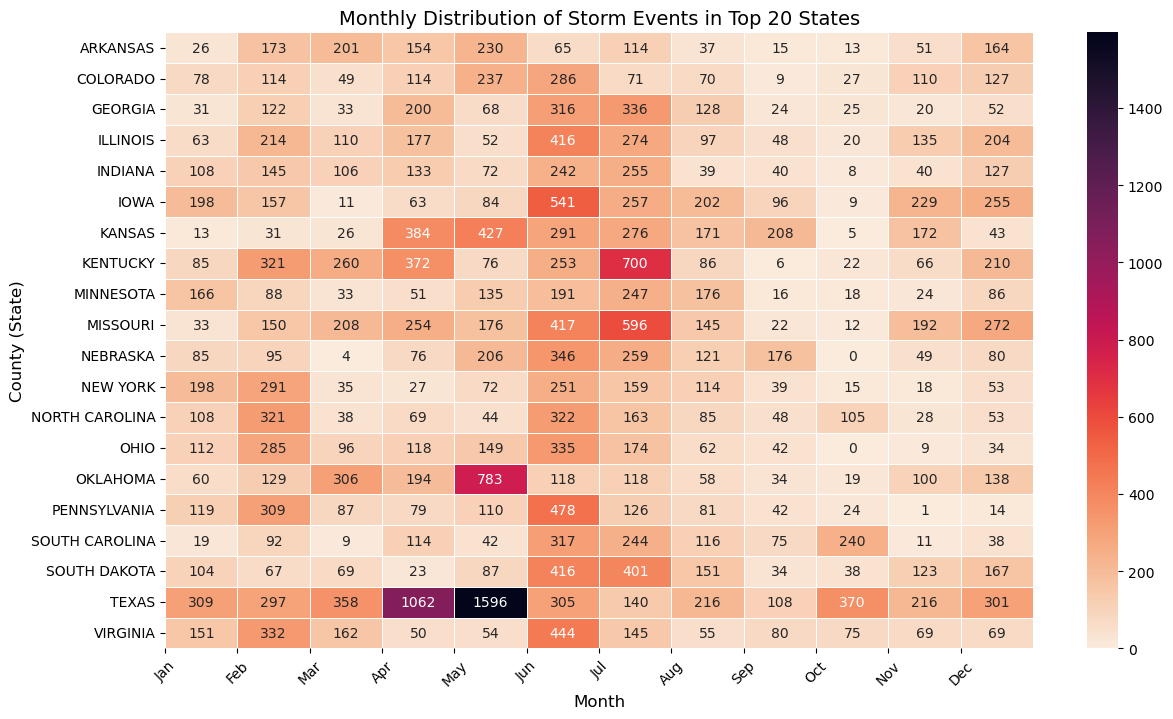

In [10]:
plot_event_heatmap(stormEvents_2015)

The above visualizations indicate that the season affects the frequency of storm events. We can observe a higher number of occurrences, particularly during the summer season (June/July/August).

### DAMAGE_PROPERTY and DAMAGE_CROPS Analysis

In this section, we will analyze how storm events have impacted property and crop damages.  
In the next part, we will explore whether there is a relationship between reported damages and power outages.

But firstly, we will convert the 'damage_property' and 'damage_crops' columns from strings to integers. For example, a value like "23K" will be transformed into 25,000.

In [11]:
stormEvents_2015['DAMAGE_PROPERTY'] = stormEvents_2015['DAMAGE_PROPERTY'].apply(convert_damage)
stormEvents_2015['DAMAGE_CROPS'] = stormEvents_2015['DAMAGE_CROPS'].apply(convert_damage)
stormEvents_2015['MAGNITUDE'] = stormEvents_2015['MAGNITUDE'].replace('', 0).fillna(0) 


for i, df in enumerate(dfs):
    df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage)
    df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].apply(convert_damage)
    df['MAGNITUDE'] = df['MAGNITUDE'].replace('', 0).fillna(0)


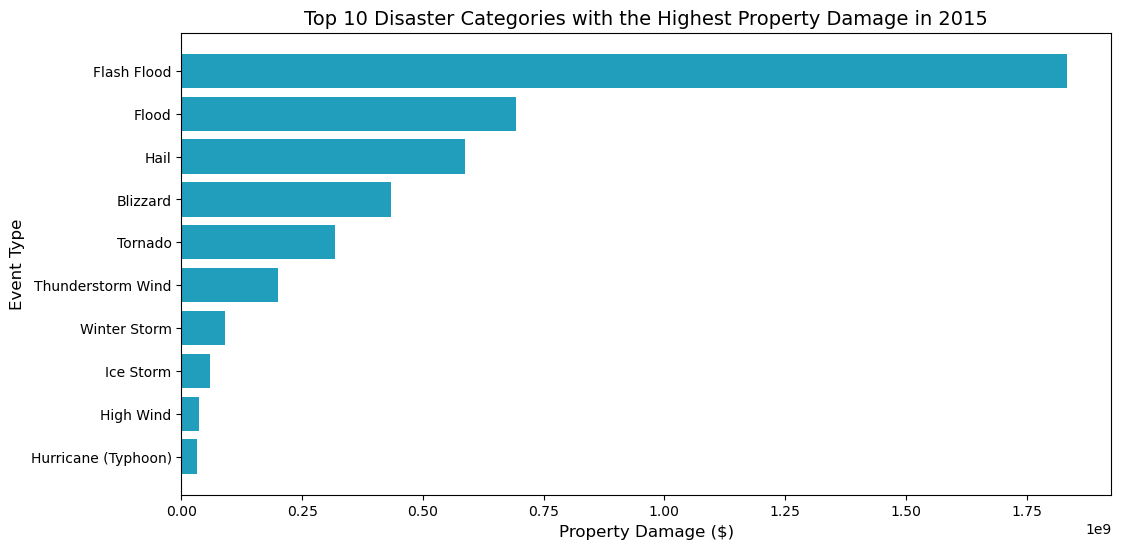

In [12]:
plot_top_damage_events(stormEvents_2015, damage_type='DAMAGE_PROPERTY')

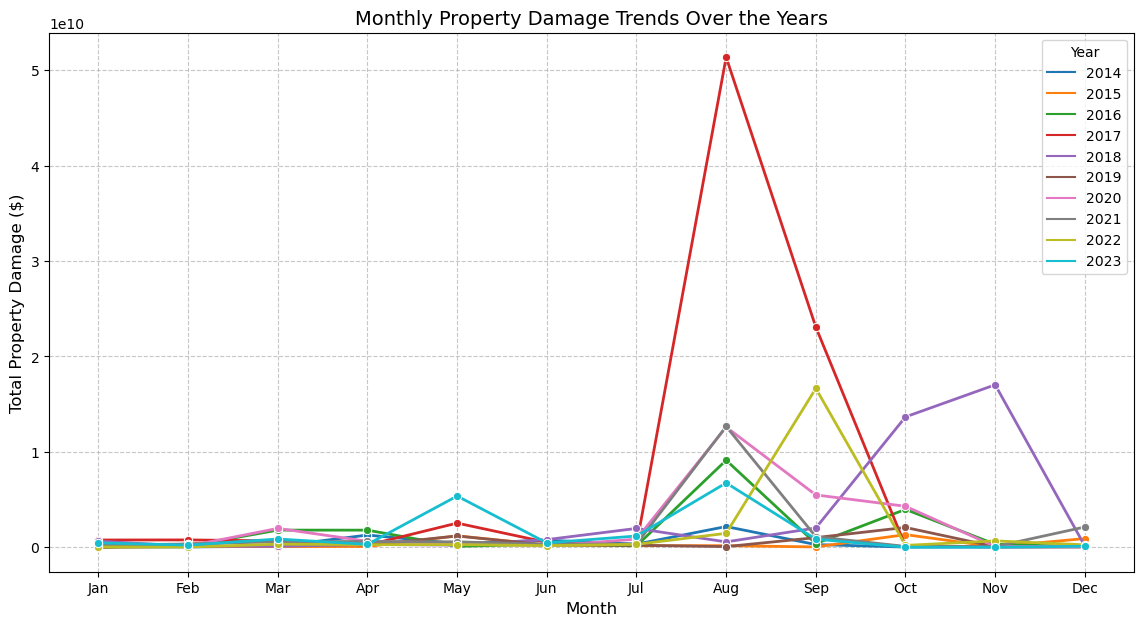

In [13]:
plot_monthly_damage(dfs, damage_type='DAMAGE_PROPERTY')

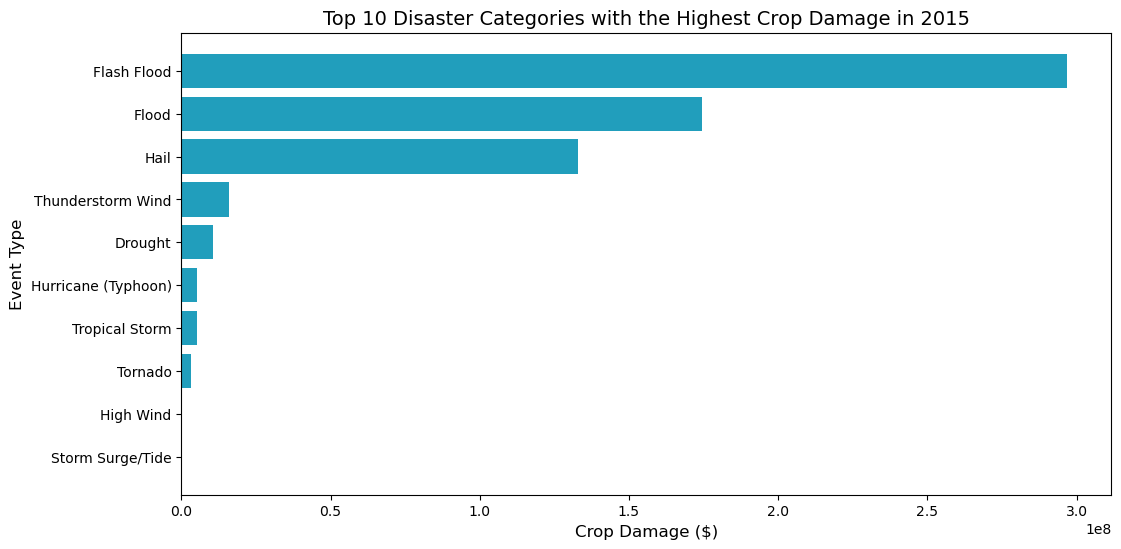

In [14]:
plot_top_damage_events(stormEvents_2015, damage_type='DAMAGE_CROPS')

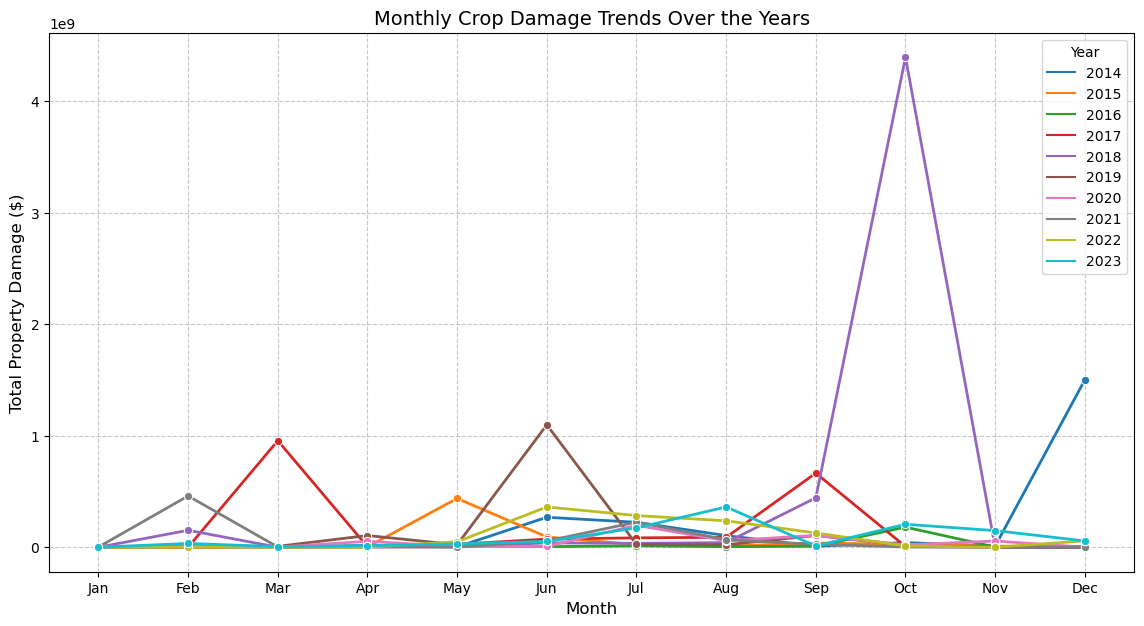

In [15]:
plot_monthly_damage(dfs, damage_type='DAMAGE_CROPS')

Damage in Property mostly correlates with the intensity of storm event occurrences, with the largest losses being recorded in August and September. Damage in Crops has a more even distribution throughout the year, with the highest losses occurring in March, June, and October.

### DATA CLEANING

Missing values in the latitude and longitude columns will be filled using the geopy library, which can convert a place (like a county) into its corresponding latitude and longitude.

In [ ]:
nom = ArcGIS()
def get_coordinates(county_name):
    try:
        location = nom.geocode(county_name)
        if location:
            return location.latitude, location.longitude
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error geocoding {county_name}: {e}")
    return None, None

In [ ]:
for index, row in stormEvents_2014.iterrows():
    if pd.isna(row['BEGIN_LAT']) or pd.isna(row['BEGIN_LON']):
        lat, lon = get_coordinates(row['CZ_NAME'])
        if lat is not None and lon is not None:
            stormEvents_2014.at[index, 'BEGIN_LAT'] = lat
            stormEvents_2014.at[index, 'BEGIN_LON'] = lon
            stormEvents_2014.at[index, 'END_LAT'] = lat
            stormEvents_2014.at[index, 'END_LON'] = lon

In [ ]:
stormEvents_2014[['CZ_NAME', 'BEGIN_LAT', 'BEGIN_LON']]

,CZ_NAME,BEGIN_LAT,BEGIN_LON
0,ALBANY,42.4719,-73.8114
1,WARREN,43.4885,-73.8923
2,ULSTER,41.7220,-74.0815
3,SCHOHARIE,42.5796,-74.5885
4,COLUMBIA,42.1747,-73.5835
5,SCHOHARIE,42.6683,-74.3099
6,SCHOHARIE,42.6224,-74.5642
7,SCHOHARIE,42.6710,-74.3077
8,ALBANY,42.7356,-73.9861
9,SCHENECTADY,42.8016,-73.9420


## NOAA_StormsEvents Data Analysis

### Data Description  

The table below provides a detailed description of the columns in the **NOAA_StormsEvents** dataset.  

| Column Name            | Description |
|------------------------|-------------|
| **fips_code**         | Federal Information Processing Standard (FIPS) code identifying the county. |
| **county**            | The county name in which the power outages occurred spelled out in text, for example “Broward”|
| **state**             | The state in which the power outage occurred, spelled out in full in text format.|
| **customers_out**     | The total number of customers without power for that county at that timestamp. This number is always an integer. Entries with 0 customers without power are not included in this dataset.|
| **run_start_time**   | Date and timestamp provided in UTC in the format “MM/DD/YY 00:00”. This timestamp marks the beginning of the collection run.|




#### Data Loading

In [3]:
eaglei_outages_2014 = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
eaglei_outages_2015 = pd.read_csv("../data/eaglei_data/eaglei_outages_2015.csv")
eaglei_outages_2016 = pd.read_csv("../data/eaglei_data/eaglei_outages_2016.csv")
eaglei_outages_2017 = pd.read_csv("../data/eaglei_data/eaglei_outages_2017.csv")
eaglei_outages_2018 = pd.read_csv("../data/eaglei_data/eaglei_outages_2018.csv")
eaglei_outages_2019 = pd.read_csv("../data/eaglei_data/eaglei_outages_2019.csv")
eaglei_outages_2020 = pd.read_csv("../data/eaglei_data/eaglei_outages_2020.csv")
eaglei_outages_2021 = pd.read_csv("../data/eaglei_data/eaglei_outages_2021.csv")
eaglei_outages_2022 = pd.read_csv("../data/eaglei_data/eaglei_outages_2022.csv")
eaglei_outages_2023 = pd.read_csv("../data/eaglei_data/eaglei_outages_2023.csv")


dfs_outages = [eaglei_outages_2014, eaglei_outages_2015, eaglei_outages_2016, eaglei_outages_2017, eaglei_outages_2018,
               eaglei_outages_2019, eaglei_outages_2020, eaglei_outages_2021, eaglei_outages_2022, eaglei_outages_2023]

In [4]:
mcc = pd.read_csv("../data/eaglei_data/MCC.csv")
all_fips = set(mcc["County_FIPS"]) 

reporting_stats = calculate_reporting_counties(dfs_outages, all_fips)

for year, reporting_count, total_counties, percentage in reporting_stats:
    print(f"Year {year}: {reporting_count}/{total_counties} counties reported ({percentage}%)")


Year 2014: 2152/3234 counties reported (66.54%)
Year 2015: 2498/3234 counties reported (77.24%)
Year 2016: 2405/3234 counties reported (74.37%)
Year 2017: 2887/3234 counties reported (89.27%)
Year 2018: 2895/3234 counties reported (89.52%)
Year 2019: 3025/3234 counties reported (93.54%)
Year 2020: 3072/3234 counties reported (94.99%)
Year 2021: 3045/3234 counties reported (94.16%)
Year 2022: 3057/3234 counties reported (94.53%)
Year 2023: 3058/3234 counties reported (94.56%)


We can observe that reporting has become more systematic over the years, and the vast majority of counties now submit reports. We will consider excluding counties that have never reported any outages.

## Modeled county customers
* County_FIPS - If a FIPS code is missing from this list, we are missing information in EAGLE-I for utilities that have customers in this county.
* Customers: The modelled result for the number of electric utility customers living in this county


In [ ]:
df_MCC = pd.read_csv('../data/eaglei_data/MCC.csv')
df_MCC

There are 3244 counties and county equivalents in.

# Eaglei_outages_

## Missing counties

In [4]:
def countyCountYEarly(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    year_counts = []

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        
        if not os.path.exists(file_path):
            print(f"File {file_name} doesn't exist!")
            year_counts.append(0)
            continue

        df_power = pd.read_csv(file_path)
        unique_fips_count = df_power['fips_code'].nunique()
        year_counts.append(unique_fips_count)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(years, year_counts, color='skyblue', edgecolor='black')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Unique FIPS Codes", fontsize=12)
    plt.title("Unique FIPS Codes per Year", fontsize=16)
    plt.xticks(years, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar, count in zip(bars, year_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()


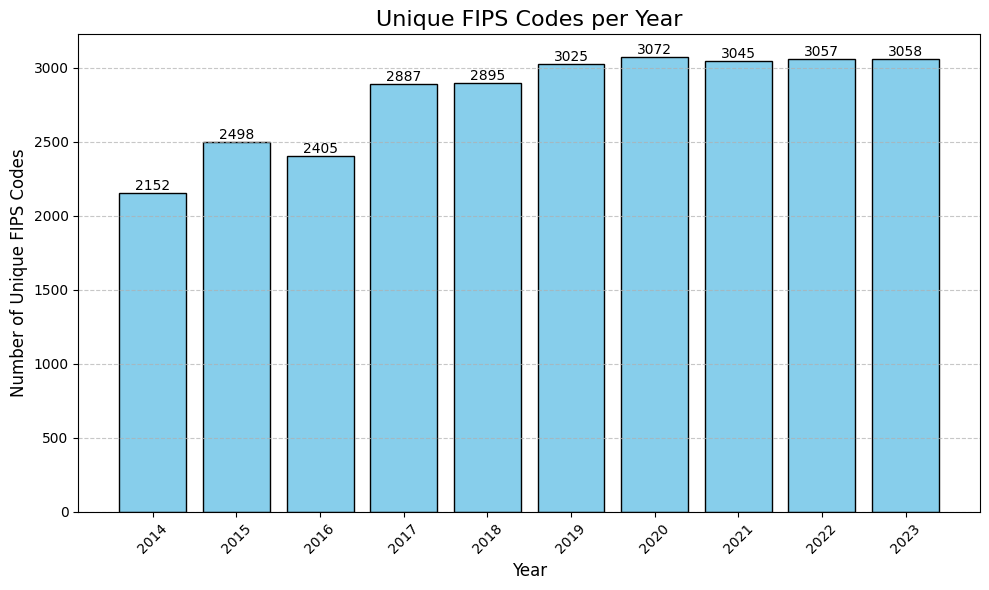

In [5]:
countyCountYEarly(2014,2023)

In [8]:
def countyCountBarPlots(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_data = pd.DataFrame()
    
    # Liczba kolumn dla siatki wykresów
    cols = 3
    rows = -(-len(years) // cols)  # Obliczanie liczby wierszy (zaokrąglanie w górę)

    fig, axes = plt.subplots(rows, cols, figsize=(15, 7 * rows))
    axes = axes.flatten()  # Spłaszczenie osi dla łatwej iteracji

    for i, year in enumerate(years):
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        
        if not os.path.exists(file_path):
            print(f"File {file_name} doesn't exist!")
            continue

        df_power = pd.read_csv(file_path)

        df_power['state'] = df_power['state'].replace('US Virgin Islands', 'United States Virgin Islands')

        unique_fips = (
            df_power.groupby('state')['fips_code']
            .nunique()
            .reset_index()
            .sort_values(by='fips_code')
        )

        axes[i].barh(unique_fips['state'], unique_fips['fips_code'], color='skyblue')
        axes[i].set_title(f'Nr of counties in {year}')
        axes[i].set_xlabel('Nr of counties')
        axes[i].set_ylabel('State')
        
    
    # Usuwanie pustych osi, jeśli wykresów jest mniej niż siatki
    for j in range(len(years), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


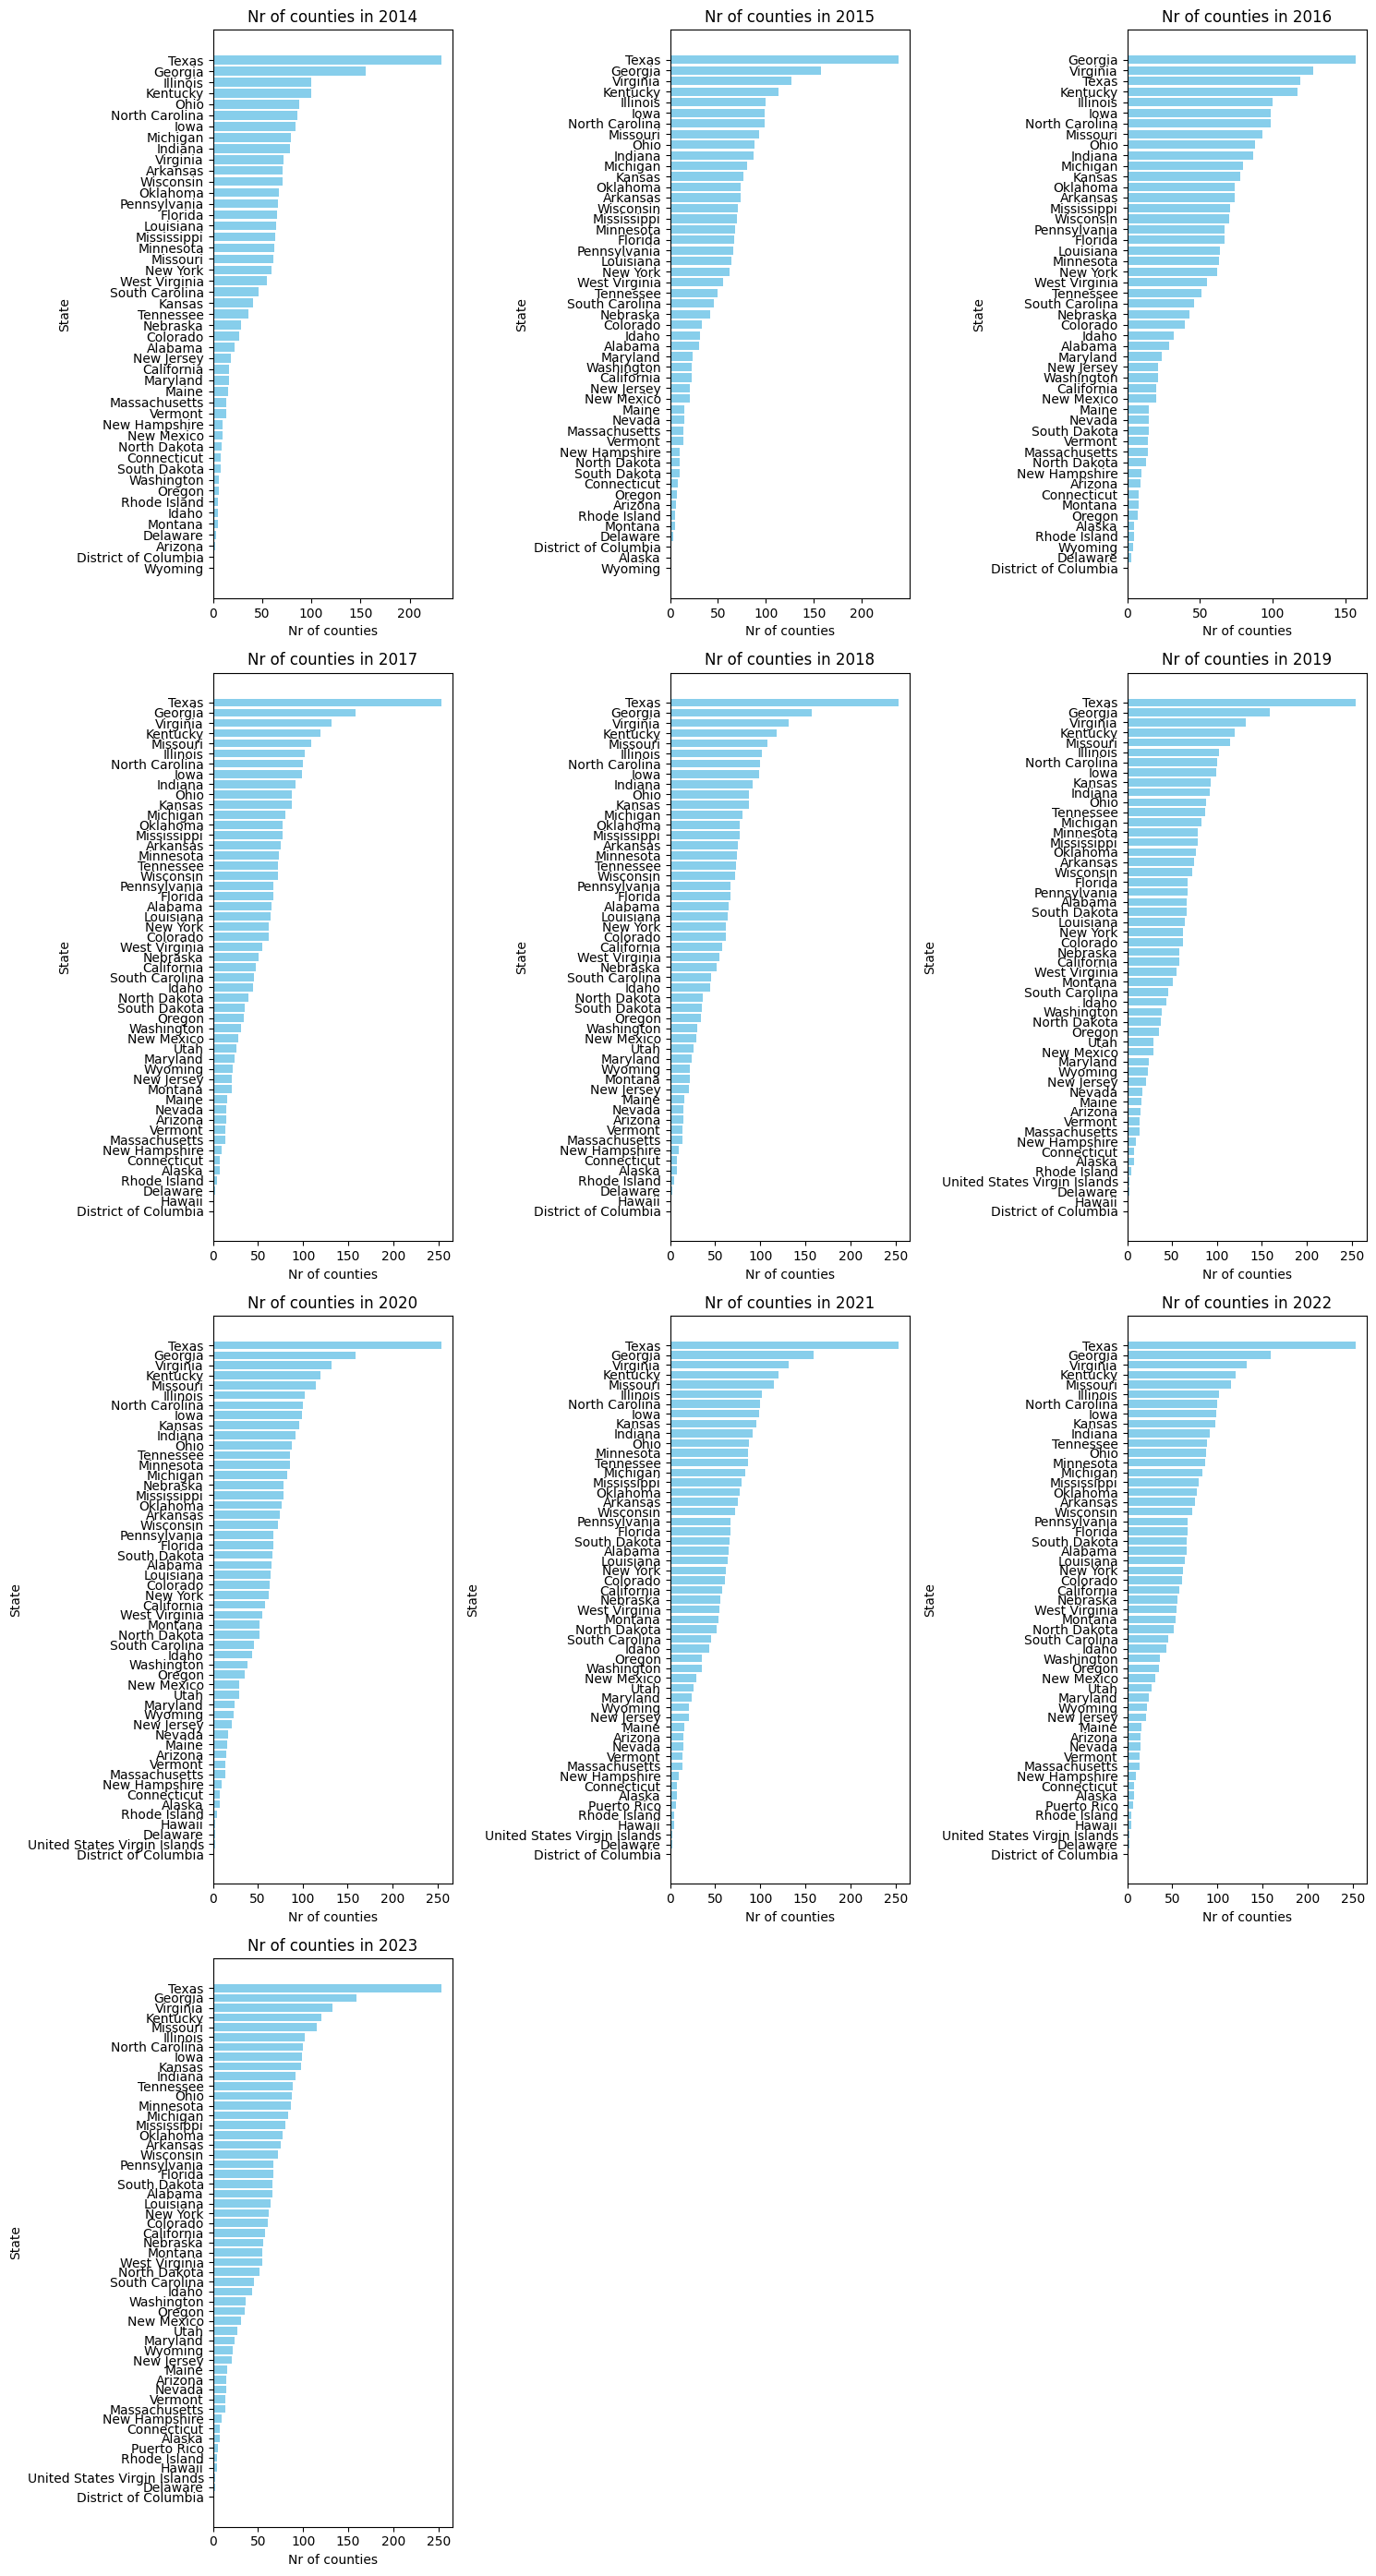

In [9]:
countyCountBarPlots(2014, 2023)

In [ ]:
def countyCountBarPlots(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_data = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"File {file_name} doesn't exist!")
            continue

        df_power = pd.read_csv(file_path)

        df_power['state'] = df_power['state'].replace('US Virgin Islands', 'United States Virgin Islands')

        unique_fips = (
            df_power.groupby('state')['fips_code']
            .nunique()
            .reset_index()
            .sort_values(by='fips_code')
        )

        unique_fips = unique_fips.rename(columns={'fips_code': year})


        if combined_data.empty:
            combined_data = unique_fips
        else:
            combined_data = pd.merge(combined_data, unique_fips, on='state', how='outer')

 
    states = combined_data['state']


    y_indexes = np.arange(len(states)) 
    height = 0.9 / len(years) 

    plt.figure(figsize=(15, 3*len(years)))

    for i, year in enumerate(years):
        plt.barh(y_indexes + i * height, combined_data[year], height=height, label=str(year))

    plt.ylabel("State", fontsize=12)
    plt.xlabel("Nr of counties", fontsize=12)
    plt.title(f"Nr of counties per state with power_outages data in consecutive years: ({year_start}, {year_end})", fontsize=16)
    plt.yticks(y_indexes + (len(years) - 1) * height / 2, states)
    plt.legend(title="Year", fontsize=10)

    plt.tight_layout()
    plt.show()
    

    


eaglei_outages_2014.csv
eaglei_outages_2015.csv
eaglei_outages_2016.csv
eaglei_outages_2017.csv
eaglei_outages_2018.csv
eaglei_outages_2019.csv
eaglei_outages_2020.csv
eaglei_outages_2021.csv
eaglei_outages_2022.csv
eaglei_outages_2023.csv


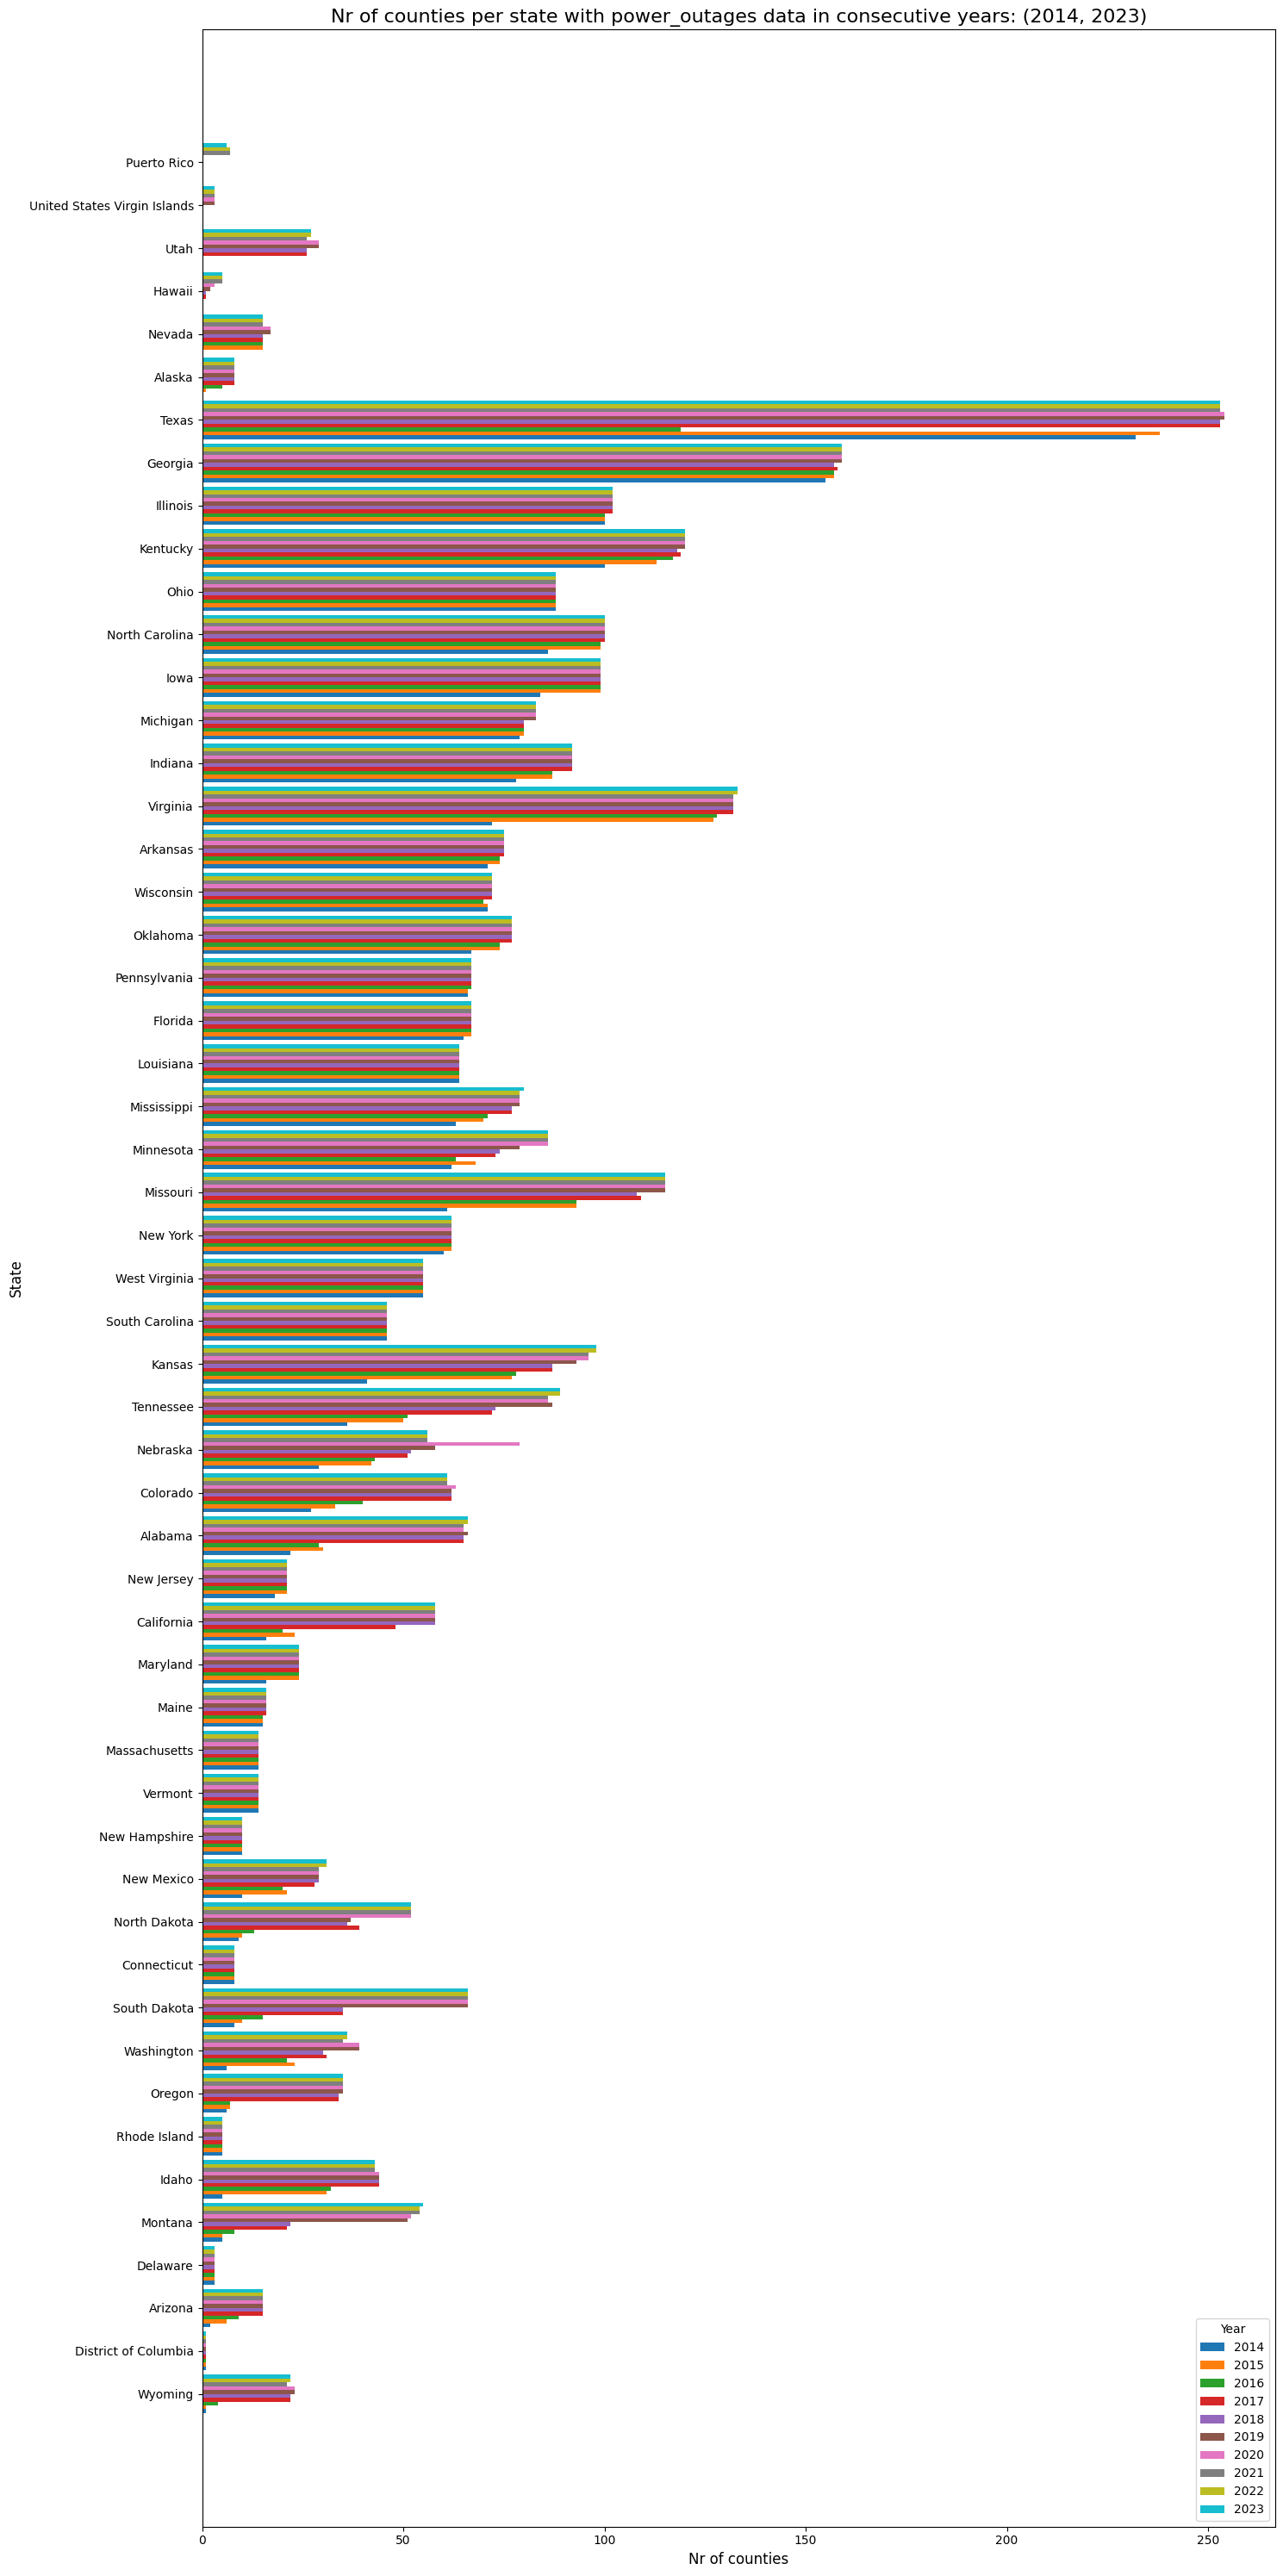

In [11]:
countyCountBarPlots(2014,2023)

In [13]:
def missingCountyMap(years):
    shapefile_path = "../data/US_county_2/cb_2018_us_county_500k.shp"
    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)
    data_folder = '../data/eaglei_data/'

    # Liczba lat i kolumn
    cols = len(years)  # Liczba wykresów w jednym wierszu
    fig, axes = plt.subplots(1, cols, figsize=(5 * cols, 3))  # Jednowierszowa siatka

    for idx, year in enumerate(years):
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)

        if not os.path.exists(file_path):
            print(f"File {file_name} doesn't exist!")
            continue

        df_power = pd.read_csv(file_path)
        df_power['fips_code'] = df_power['fips_code'].astype(str).str.zfill(5)
        fips_codes = pd.DataFrame(df_power['fips_code'].unique(), columns=["FIPS"])
        merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
        merged['Data'] = merged['FIPS'].apply(lambda x: 0 if pd.isna(x) else 1)

        us_bounds = box(-125, 24, -66, 50)
        mainland_us = merged[merged.geometry.intersects(us_bounds)]
        nan_counties = mainland_us[mainland_us['FIPS'].isna()]
        non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

        # Wyświetlanie na odpowiedniej osi
        ax = axes[idx]
        nan_counties.plot(ax=ax, color="black", edgecolor="black", label="No data")
        non_nan_counties.plot(ax=ax, color="white", edgecolor="grey", label="Recorded data")

        ax.set_title(f"Missing counties {year}")
        ax.set_axis_off()  # Wyłączenie osi dla estetyki

    plt.tight_layout()
    plt.show()


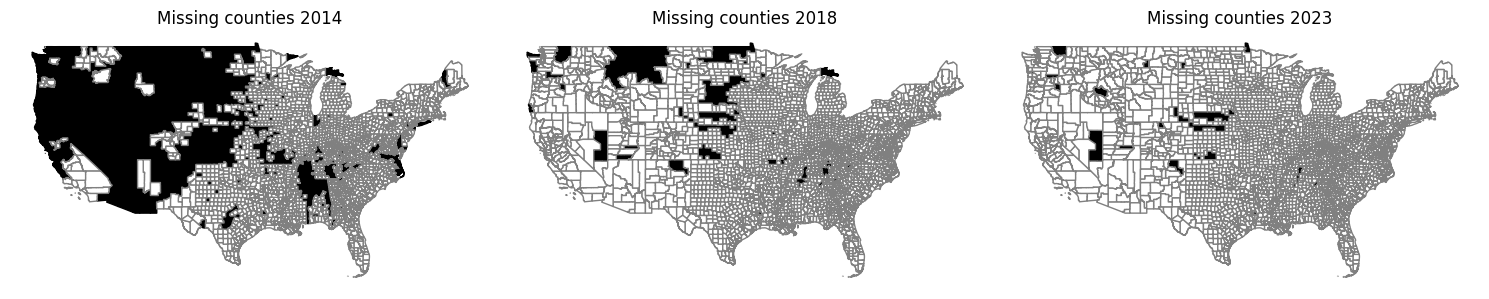

In [14]:
missingCountyMap([2014, 2018, 2023])

In [162]:
def missingCountyMapManyYears(df):
    url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
    usa_states = gpd.read_file(url)
    # shapefile_path = "../data/US_county/tl_2024_us_county.shp"
    shapefile_path = "../data/US_county_2/cb_2018_us_county_500k.shp"

    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)


    df.loc[:, 'fips_code']  = df['fips_code'].astype(str).str.zfill(5)

    fips_codes = df.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})
    fips_codes['Data'] = df['normalized_non_nan']

    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    merged['Data'] = merged['Data'].fillna(0)

    us_bounds = box(-125, 24, -66, 50)

    mainland_us = merged[merged.geometry.intersects(us_bounds)]

    nan_counties = mainland_us[mainland_us['FIPS'].isna()]
    non_nan_counties = mainland_us[mainland_us['FIPS'].notna()]

    mainland_states = usa_states[usa_states.geometry.intersects(us_bounds)]


    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    
    mainland_us.plot(column='Data', ax=ax, cmap="Reds", legend=True, 
                      edgecolor="grey", missing_kwds={"color": "lightgrey"})

    # nan_counties.plot(ax=ax, color="black", edgecolor="black", label="No data in all years")

    mainland_states.boundary.plot(ax=ax, color='red', linewidth=1, label="State's borders")


    ax.set_title("Mainland US counties present in eaglei_outages", fontsize=16)

    plt.show()

def drawMap(df, bounds,ax, name):

    shapefile_path = "../data/US_county_2/cb_2018_us_county_500k.shp"

    counties = gpd.read_file(shapefile_path)
    counties['GEOID'] = counties['GEOID'].astype(str)

    
    df.loc[:, 'fips_code']  = df['fips_code'].astype(str).str.zfill(5)
    fips_codes = df.iloc[:,0].to_numpy().reshape(-1,1)
    fips_codes = pd.DataFrame(np.unique(fips_codes))
    fips_codes= fips_codes.astype(str)
    fips_codes = fips_codes.rename(columns={0 : "FIPS"})


    merged = counties.merge(fips_codes, left_on='GEOID', right_on='FIPS', how='left')
    merged = merged.merge(df, left_on="FIPS", right_on="fips_code", how="left")
    merged['normalized_non_nan'] = merged['normalized_non_nan'].fillna(0)


    map_data = merged[merged.geometry.intersects(bounds)]

    nan_counties = map_data[map_data['FIPS'].isna()]
    non_nan_counties = map_data[map_data['FIPS'].notna()]
    map_data.plot(column='normalized_non_nan', ax=ax, cmap="Reds", legend=True, vmin=0, vmax=1,
                        edgecolor="grey", missing_kwds={"color": "lightgrey"})
    # non_nan_counties.plot(column='Data', ax=ax, cmap="Reds", 
    #                     edgecolor="grey", missing_kwds={"color": "lightgrey"})

    ax.set_xlim(bounds.bounds[0], bounds.bounds[2])  # Od min_x do max_x
    ax.set_ylim(bounds.bounds[1], bounds.bounds[3])  # Od min_y do max_y

    ax.set_title(f"{name} counties present in eaglei_outages", fontsize=16)

    

def countyCountMAP(year_start, year_end):
    data_folder = '../data/eaglei_data/'

    years = range(year_start, year_end + 1)
    combined_count = pd.DataFrame()

    for year in years:
        file_name = f'eaglei_outages_{year}.csv'
        file_path = os.path.join(data_folder, file_name)
        print(file_name)
        if not os.path.exists(file_path):
            print(f"Plik {file_name} nie istnieje!")
            continue

        df_power = pd.read_csv(file_path)

        unique_fips_2 =(
            df_power[['fips_code', 'state']]
            .drop_duplicates().sort_values(by='fips_code').reset_index()
            .drop(columns=['state', 'index'])
        )

        unique_fips_2['col'] = unique_fips_2['fips_code']
        unique_fips_2 = unique_fips_2.rename(columns={'col': year})

        if combined_count.empty:
            combined_count = unique_fips_2
        else:
            combined_count = pd.merge(combined_count, unique_fips_2, on='fips_code', how='outer')



    combined_count['non_nan_count'] = combined_count.drop(columns=['fips_code']).notna().sum(axis=1)
    num_columns_to_count = combined_count.drop(columns=['fips_code', 'non_nan_count']).shape[1]

    combined_count['normalized_non_nan'] = combined_count['non_nan_count'] / num_columns_to_count
    df = combined_count[['fips_code','normalized_non_nan']]
    missingCountyMapManyYears(df)
    hawaii_bounds = box(-161, 18, -154, 23) 
    alaska_bounds = box(-180, 50, -125, 72)
    caribbean_bounds = box(-68, 17.5, -64.4, 18.7) 
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    drawMap(df, hawaii_bounds, axes[0], "Hawaii")
    drawMap(df, alaska_bounds, axes[1], "Alaska")
    drawMap(df, caribbean_bounds, axes[2], "United States Virgin Islands and Puerto Rico\n")
    plt.tight_layout()
    plt.show()


    

eaglei_outages_2014.csv
eaglei_outages_2015.csv
eaglei_outages_2016.csv
eaglei_outages_2017.csv
eaglei_outages_2018.csv
eaglei_outages_2019.csv
eaglei_outages_2020.csv
eaglei_outages_2021.csv
eaglei_outages_2022.csv
eaglei_outages_2023.csv


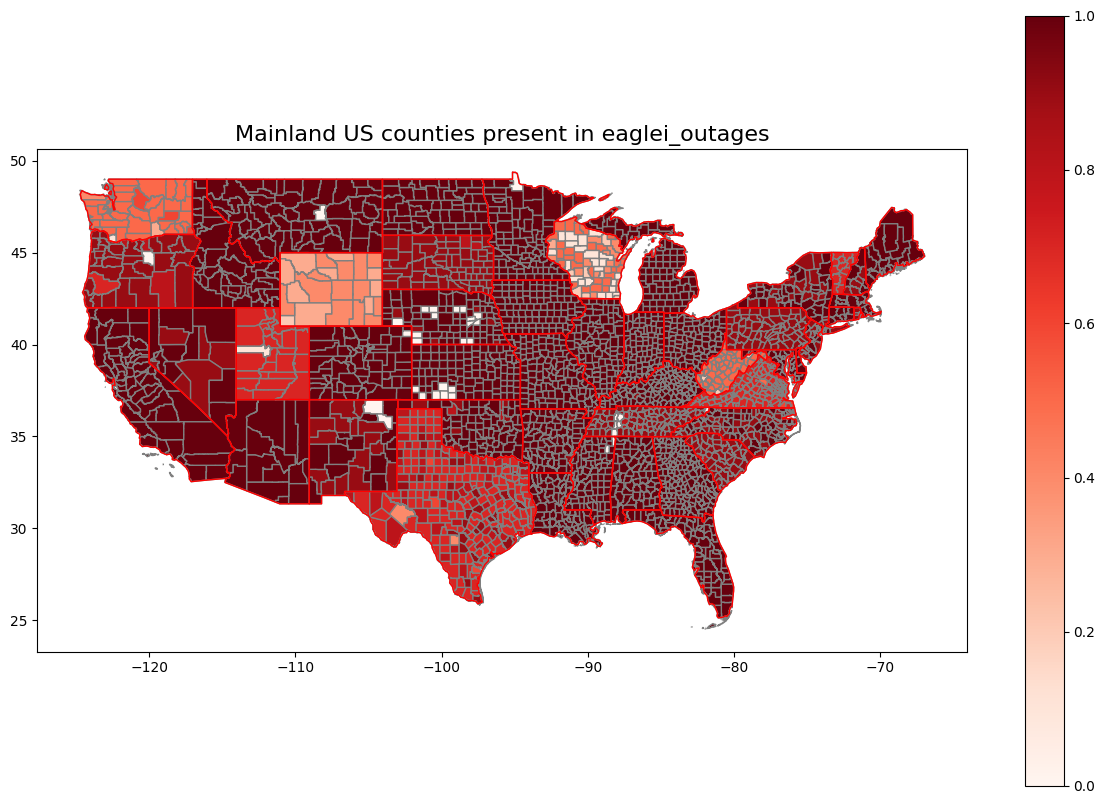

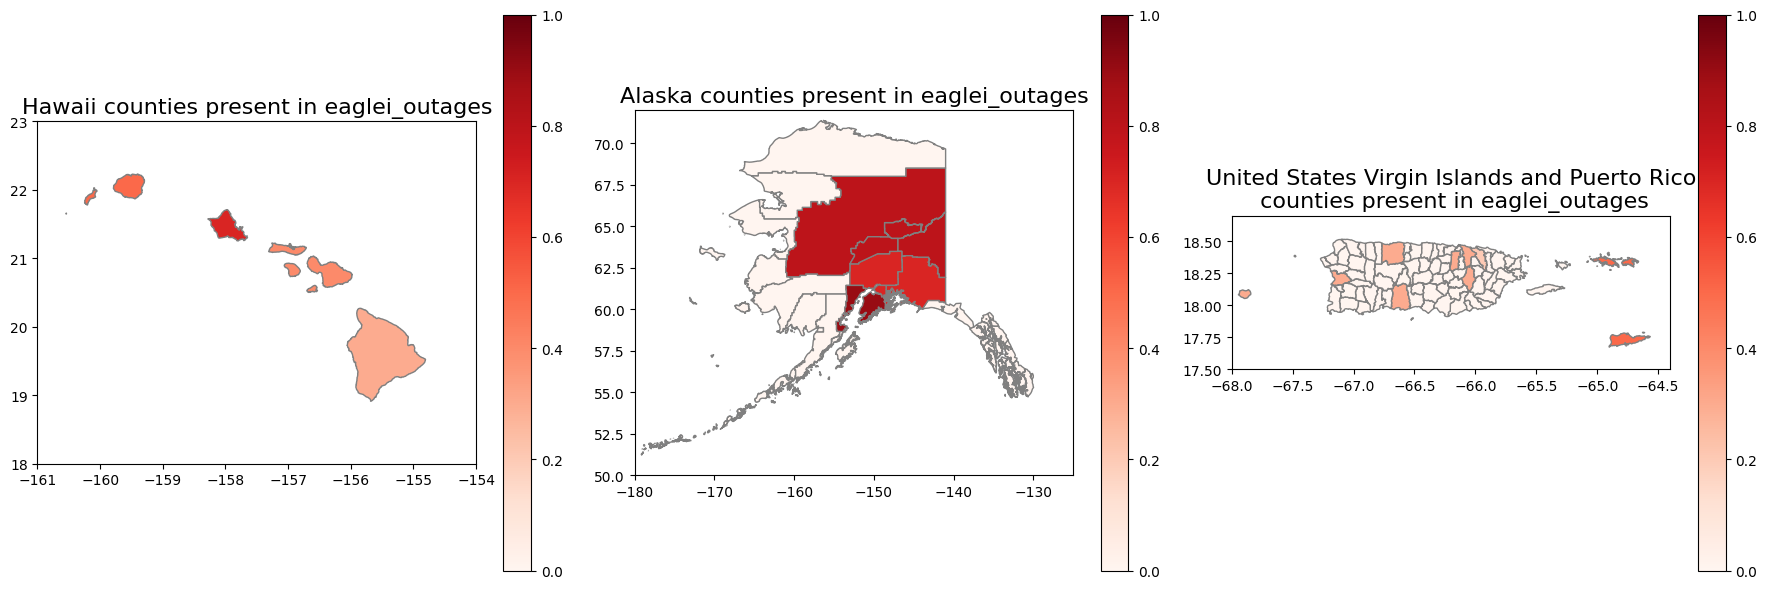

In [163]:
countyCountMAP(2014,2023)

### Eaglei_outages 2014 - missing timeline

In [ ]:
df_power = pd.read_csv("../data/eaglei_data/eaglei_outages_2014.csv")
df_power

,fips_code,county,state,customers_out,run_start_time
0,1037,Coosa,Alabama,12,2014-11-01 04:00:00
1,1051,Elmore,Alabama,7,2014-11-01 04:00:00
2,1109,Pike,Alabama,1,2014-11-01 04:00:00
3,1121,Talladega,Alabama,31,2014-11-01 04:00:00
4,4017,Navajo,Arizona,1,2014-11-01 04:00:00
...,...,...,...,...,...
1689455,55029,Door,Wisconsin,1,2014-12-31 00:00:00
1689456,55079,Milwaukee,Wisconsin,1,2014-12-31 00:00:00
1689457,55093,Pierce,Wisconsin,6,2014-12-31 00:00:00
1689458,55125,Vilas,Wisconsin,6,2014-12-31 00:00:00


## Example of Dataset Merging Process

We will use the `combine_agg_ts` function (found in `data_processing.py`), which returns the daily and/or hourly aggregated data. The merged dataset will include the following transformations:

- **Customer outages** will be aggregated by summing the `customers_out` column.
- The `event_type` column will be transformed into separate columns for each event category, named `event_count_{event_category}`. Each category will contain the sum of occurrences for that specific event type.
- Relevant columns such as `injuries_direct`, `injuries_indirect`, `deaths_direct`, and `deaths_indirect` will be included in the dataset. Additional columns may be added or removed during the Feature Engineering phase as needed.

This process will allow us to combine power outage and event data, ensuring it is ready for further analysis or modeling. Here we will use only small portion of data, for demonstrational purposes

In [11]:
hour, day = combine_agg_ts1("HARRIS",
                   2015,
                   4,
                   3,
                   2015,
                   5,
                   28,
                   data_directory_power = 'C:\\Users\\HP\\studia\\trzeci rok\\semestr6\\Projekt Interdyscplinarny\\data\\data\\eaglei_data',
                   data_directory_events = 'C:\\Users\\HP\\studia\\trzeci rok\\semestr6\\Projekt Interdyscplinarny\\data\\data\\NOAA_StormEvents')

In [12]:
day.head()

,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,event_count Winter Storm,event_count Hail,event_count Thunderstorm Wind,event_count Flash Flood,event_count Heavy Rain,event_count Lightning,...,event_count Funnel Cloud,event_count Tropical Storm,event_count Heat,event_count Flood,event_count Drought,event_count Heavy Snow,event_count Strong Wind,event_count Extreme Cold/Wind Chill,event_count Sleet,customers_out
time,,,,,,,,,,,,,,,,,,,,,
2015-04-04,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,152
2015-04-05,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-04-06,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-04-07,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-04-08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [13]:
hour['county'] = 'HARRIS'
day['county'] = 'HARRIS'

In [14]:
day[day['event_count Hail'] > 0]

,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,event_count Winter Storm,event_count Hail,event_count Thunderstorm Wind,event_count Flash Flood,event_count Heavy Rain,event_count Lightning,...,event_count Tropical Storm,event_count Heat,event_count Flood,event_count Drought,event_count Heavy Snow,event_count Strong Wind,event_count Extreme Cold/Wind Chill,event_count Sleet,customers_out,county
time,,,,,,,,,,,,,,,,,,,,,
2015-04-16,0.0,0.0,0.0,0.0,0,4,0,8,0,0,...,0,0,0,0,0,0,0,0,4,HARRIS
2015-04-19,0.0,0.0,0.0,0.0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,78,HARRIS
2015-05-25,0.0,0.0,60.0,10.0,0,1,1,10,0,0,...,0,0,0,0,0,0,0,0,4,HARRIS
2015-05-26,0.0,0.0,126.0,21.0,0,1,1,21,0,0,...,0,0,0,0,0,0,0,0,13362,HARRIS


In [15]:
day[day['injuries_direct'] > 0]

,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,event_count Winter Storm,event_count Hail,event_count Thunderstorm Wind,event_count Flash Flood,event_count Heavy Rain,event_count Lightning,...,event_count Tropical Storm,event_count Heat,event_count Flood,event_count Drought,event_count Heavy Snow,event_count Strong Wind,event_count Extreme Cold/Wind Chill,event_count Sleet,customers_out,county
time,,,,,,,,,,,,,,,,,,,,,
2015-05-24,8.0,0.0,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6,HARRIS


The merging is working well